In [1]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [6]:
api = wandb.Api()
yolo = api.run("jer2ig/YOLOv5-Classifier/2fu7s8ta")
vgg = api.run("jer2ig/yolo_fork-damage_assessment/2xzt2ha9")

# Plot data

C:\Users\Julius\AppData\Local\Temp/ipykernel_15768/2353351549.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


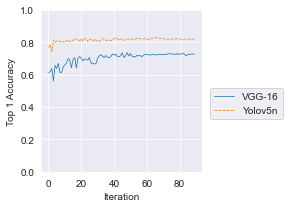

In [26]:
vgg_hist = vgg.history(x_axis="_step", pandas=(True), stream="default")
vgg_hist = vgg_hist.rename(columns={"val/Loss": "test/loss",
                                    "train/Loss": "train/loss",
                                    "val/Acc@1" : "metrics/accuracy_top1"
                                    })
vgg_hist["metrics/accuracy_top1"] /= 100
vgg_hist = vgg_hist.rename(columns=lambda c: "vgg:"+str(c))
yolo_hist = yolo.history(x_axis="_step", pandas=(True), stream="default")
yolo_hist = yolo_hist.rename(columns=lambda c: "yolo:"+str(c))

runs = pd.concat([vgg_hist, yolo_hist], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))

sns.lineplot(data=runs.filter(regex="accuracy_top1"),legend=None, ax=ax, linewidth=.75)
ax.set_xlabel("Iteration")
ax.set_ylabel("Top 1 Accuracy")
ax.set_ylim(0,1)

fig.tight_layout()
fig.legend(labels=["VGG-16", "Yolov5n"],loc='right', bbox_to_anchor=(1.35, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
fig.savefig('trial_classification.pdf', bbox_inches='tight')


In [1]:
fig, ax = plt.subplots(1, 2,sharey='row',sharex= 'col', figsize=(6, 3))

ax[0].set_title("Training")
ax[1].set_title("Testing")

sns.lineplot(data=runs.filter(regex="train/loss"),legend=None, ax=ax[0], linewidth=.75)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Iteration")
ax[0].set_ylim(0,1)
sns.lineplot(data=runs.filter(regex="test/loss"),legend=None, ax=ax[1], linewidth=.75)
ax[1].set_xlabel("Iteration")

#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["VGG-16", "Yolov5n"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('trial_loss_classification.pdf', bbox_inches='tight')

NameError: name 'plt' is not defined

In [26]:
pred = np.loadtxt("Classification/predictions.txt")
targets = np.loadtxt("Classification/targets.txt")
pred = np.argmin(pred, axis=1)
correct = pred == targets

In [36]:
tp = np.count_nonzero(np.logical_and(pred == 1, targets == 1))
tn = np.count_nonzero(np.logical_and(pred == 0, targets == 0))
fp = np.count_nonzero(np.logical_and(pred == 1, targets == 0))
fn = np.count_nonzero(np.logical_and(pred == 0, targets == 1))
confusion = np.array([[tp, fp],[fn, tn]])
confusion = confusion / np.sum(confusion)

In [37]:
confusion

array([[0.40037665, 0.0700565 ],
       [0.12919021, 0.40037665]])

In [38]:
np.unique(pred, return_counts=True)

(array([0, 1], dtype=int64), array([1406, 1249], dtype=int64))

C:\Users\Julius\AppData\Local\Temp/ipykernel_9620/1163076284.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


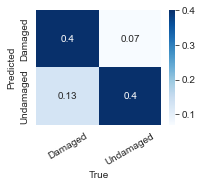

In [39]:
x = ["Damaged", "Undamaged"]
y = x

fig, ax = plt.subplots(1, 1, figsize=(3, 2.7))
sns.heatmap(confusion, xticklabels=x, yticklabels=y,annot=True, cmap='Blues')
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
fig.tight_layout()
fig.show()
fig.savefig('damc_confusion.pdf', bbox_inches='tight')